volledige steekproef, beperkt aantal features

In [1]:
import os
os.environ['RAY_ENABLE_MAC_LARGE_OBJECT_STORE'] = '1'

In [2]:
import ray

In [3]:
# ray.shutdown()
ray.init()
# ray.init(address='auto')
# ray.init(num_cpus=8, include_dashboard=True)

2022-12-19 15:51:16,572	INFO worker.py:1529 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


Python version:,3.10.8
Ray version:,2.2.0
Dashboard:,http://127.0.0.1:8265


In [4]:
import pandas as pd
data = pd.read_csv("tibb_mcf.csv")
data.head(10)

,wkl_6maand,werk_6maand,interim_6maand,ziek_6maand,onderw_6maand,wkl_84maand,werk_84maand,interim_84maand,ziek_84maand,onderw_84maand,...,w19,w20,w21,w22,w23,w24,onderwijs,leeftijd,wkldr,penhoud
0,6,0,0,0,0,70,13,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,3,3,3
1,6,0,0,0,0,28,17,0,0,12,...,0.0,0.0,0.0,0.0,0.0,1.0,2,2,2,1
2,6,0,0,0,0,40,20,6,0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,2,3,2,0
3,6,0,0,0,0,9,75,0,0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1,3,2,3
4,0,0,0,6,0,17,0,0,67,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,2,3,0
5,6,0,0,0,0,38,44,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,2,3,0
6,6,0,0,0,0,35,0,0,49,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,3,3,0
7,6,0,0,0,0,25,0,0,59,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,2,3,0
8,6,0,0,0,0,39,22,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,3,3,1
9,3,0,0,3,0,26,15,0,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,2,3,0


In [5]:
data.shape

(132825, 115)

In [6]:
import mcf

In [7]:
from mcf import modified_causal_forest

In [8]:

outpfad =("./data")
datpfad =("./data")
indata = 'tibb_mcf'        

In [9]:
d_name = ["treat"]  # Treatment
y_name = ["w8"]  # List of outcome variables
x_name_unord = ["jaar_actie"]
x_name_ord = [
    "duur_berekend",
    "ARBEIDSBEPERKING",
    "INBURGERAAR",
    "KWETSBAAR_BIU",
    "sex",
    "age",
    "city",
    "aalst",
    "Antwerpen",
    "Brugge",
    "Dendermonde",
    "Eeklo",
    "Gent",
    "Hasselt",
    "Ieper",
    "Kortrijk",
    "Leuven",
    "Maaseik",
    "Mechelen",
    "Oostende",
    "Oudenaarde",
    "Roeselare",
    "Sintniklaas",
    "Tielt",
    "Tongeren",
    "Turnhout",
    "Vilvoorde",
    "nietvlaanderen",
] 
#'aant_beroepen', 'aba' , 'aso2', 'aso3' , 'bso2', 'bso3', 'buso', 'dbso', 'hbo', 'kso2' ,'kso3' ,'ma', 'pba' , 'so1' , 'tso2', 'tso3',
#'age_lt21', 'age_lt25', 'age_lt36' ,'age_lt45' ,'age_lt55', 'belg' , 'eu_core', 'eu_east' ,'eu_south' ,'row' ,'tm',
#'duits' ,'engels', 'frans', 'italiaans', 'spaans', 'ned0', 'ned1', 'ned2', 'ned3', 'in14', 'interim_6maand' ,  'onderw_6maand', 'werk_6maand', 'wkl_6maand' ,'ziek_6maand' ,
#'interim_84maand' , 'onderw_84maand', 'werk_84maand', 'wkl_84maand', 'ziek_84maand',  'laatste_werk', 'nooit_gewerkt' ,'rijbew_B' ,'rijbew_C', 'rijbew_D', 'n_auto', 'foon', 'email' ]

z_name_list = ["onderwijs", "leeftijd", "wkldr"]

# mp_with_ray =False
mp_parallel = 100  # max=192
# mp_ray_objstore_multiplier = 1000
# mp_ray_shutdown=False
mp_ray_del = ("refs", "rest")



Directory for output ./data already exists A new directory is created for the output.
Directory for output ./data0 already exists A new directory is created for the output.
Directory for output ./data1 already exists A new directory is created for the output.
Directory for output ./data2 already exists A new directory is created for the output.
Directory for output ./data3 already exists A new directory is created for the output.
Successfully created the directory ./data4
Successfully created the directory ./data4/_tempmcf_

Parameter for MCF:
output_type :   2
outpfad :   ./data4
datpfad :   ./data
indata :   ./data/tibb_mcf.csv
preddata :   ./data/tibb_mcf.csv
outfiletext :   ./data4/tibb_mcf.txt
screen_covariates :   True
n_min_grid :   1
check_perfectcorr :   True
n_min_min :   15
clean_data_flag :   True
min_dummy_obs :   10
mce_vart :   1
mtot_p_diff_penalty :   1.1735278169250287
boot :   1000
support_min_p :   0.01
common_support :   1
support_quantil :   1
support_adjust_limit

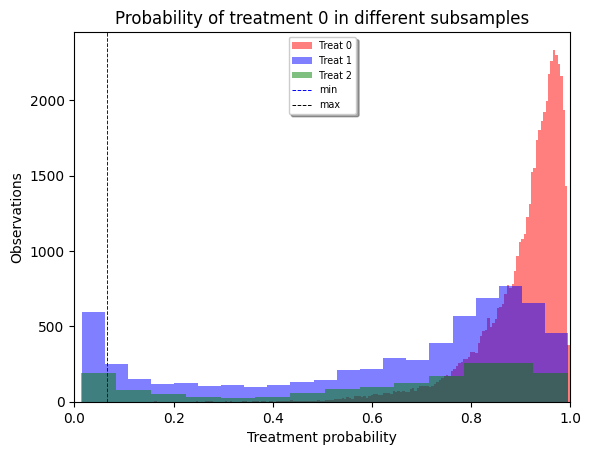

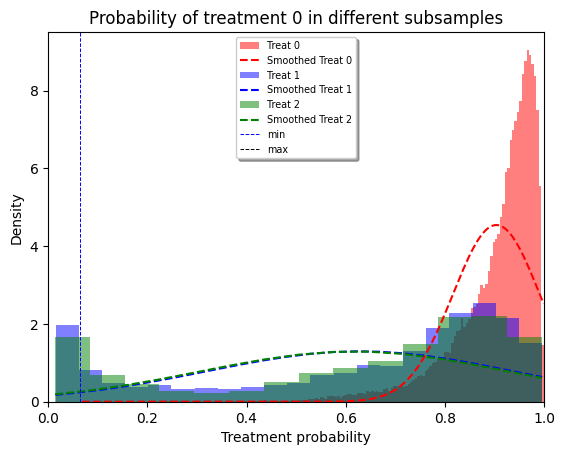

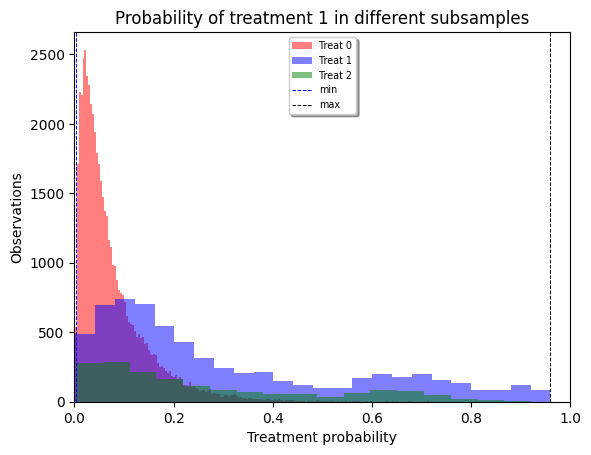

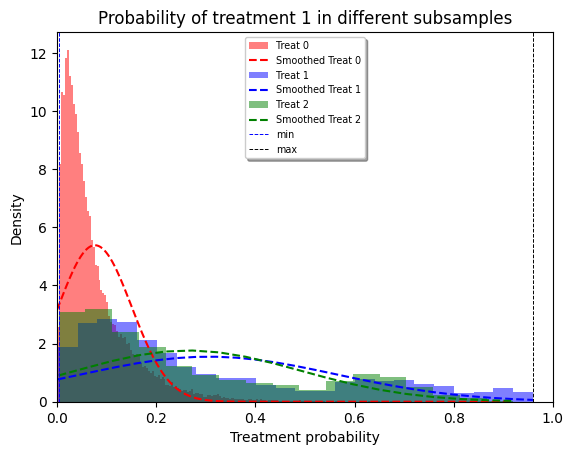

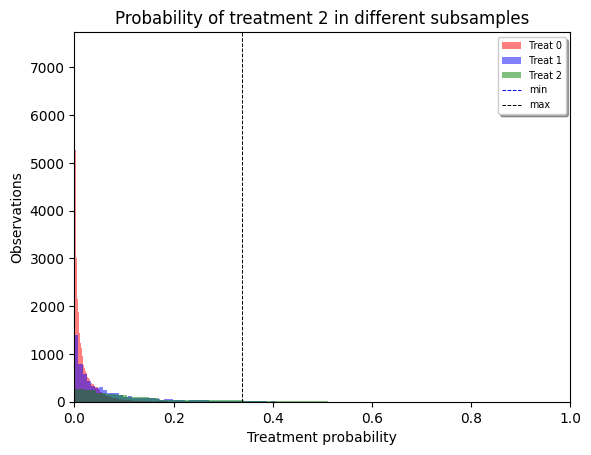

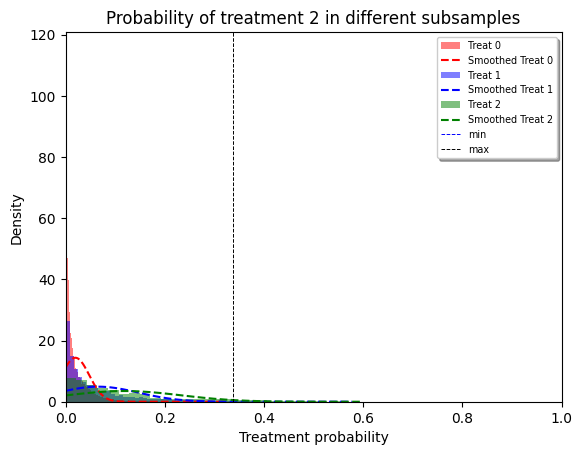



Common support check
--------------------------------------------------------------------------------
Upper limits on treatment probabilities: 104.54689%  95.98709%  33.71973% 
Lower limits on treatment probabilities:   6.48794%   0.34291%   0.01134% 
--------------------------------------------------------------------------------
Data investigated and saved:./data4/_tempmcf_/tree_sample_tmp.csv
--------------------------------------------------------------------------------
Observations deleted: 1924 (3.167%)
--------------------------------------------------------------------------------
Observations kept by treatment
            Obs.  Share in %
TREAT                   
0      51617   87.736266
1       5782    9.827985
2       1433    2.435749
-   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   
Observations deleted by treatment
        Obs.  Share in %
TREAT                  
0      1024   53.222453
1       676   35.135135
2       224   11.642412

Full

2022-12-19 15:57:32,924	INFO worker.py:1529 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


Size of Ray Object Store:  3768  MB

Share completed (%):    0    5   10   15   20   25   30   35   40   45   50   55   60   65   70 

(raylet) Spilled 2207 MiB, 30 objects, write throughput 964 MiB/s. Set RAY_verbose_spill_logs=0 to disable this message.
(raylet) Spilled 4155 MiB, 56 objects, write throughput 1260 MiB/s.
(raylet) Spilled 8205 MiB, 111 objects, write throughput 1516 MiB/s.


  75 

(raylet) Spilled 16468 MiB, 223 objects, write throughput 1792 MiB/s.


  80   85   90   95 Task completed


-------------------------------------------------------------------------------- 
OOB MSE (without penalty) for M_try, minimum leafsize  and alpha_reg combinations 


Number of vars / min. leaf size / alpha reg. / OOB value Trees without OOB
           3           15           0.100     1.392     0
           3           15           0.200     1.393     0
          21           15           0.100     1.305     0
          21           15           0.200     1.307     0
Minimum OOB MSE:         1.305
Number of variables:  21
Minimum leafsize:     15
Alpha regularity:     0.1
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
Parameters of estimation to build random forest
Outcome variable used to build forest:   W8LC
Features used to build forest:           DUUR_BEREKEND ARBEIDSBEPERKING INBURGERAAR KWETSBAAR_BIU SEX AGE CITY AALST ANTWERP

KeyboardInterrupt: 

In [10]:
%%time
# if __name__ == '__main__':
modified_causal_forest(
    outpfad=outpfad, datpfad=datpfad, indata=indata,
    d_name=d_name, 
    y_name=y_name,
    x_name_unord=x_name_unord, 
    x_name_ord=x_name_ord,
    z_name_list=z_name_list,
    # _mp_ray_del=mp_ray_del,  
    # mp_parallel=8,
)

        #mp_with_ray =  mp_with_ray )
        
        #_mp_ray_shutdown=mp_ray_shutdown
        
        # mp_parallel=mp_parallel, _mp_ray_objstore_multiplier =mp_ray_objstore_multiplier )